A Jupyter Widget

<IPython.core.display.Javascript object>


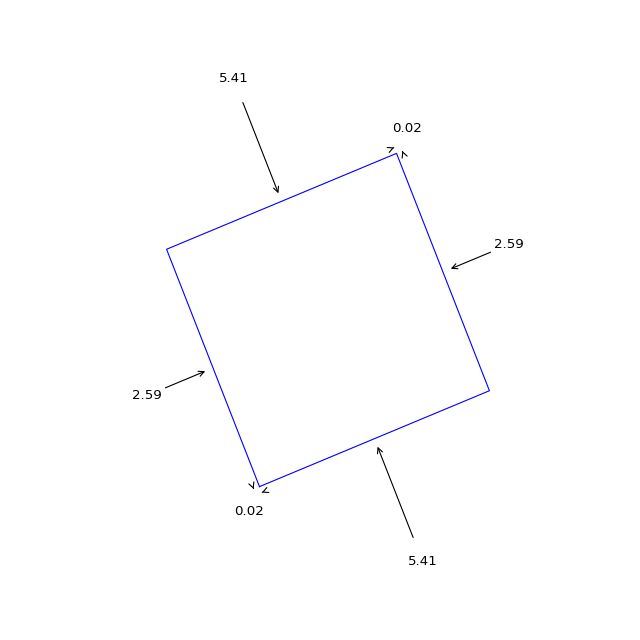

In [3]:
%matplotlib notebook
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np
from IPython.display import display

class StressRotation:
    def __init__(self):
        self.thetawidget = widgets.HBox([widgets.FloatText(value=0.0,layout = widgets.Layout(width='60px')),widgets.Label('Initial Angle (deg)')])
        self.sigzzwidget = widgets.HBox([widgets.FloatText(value=5.0,layout=widgets.Layout(width='60px')),widgets.HTMLMath('$$\sigma_{zz}$$')])
        self.sigxxwidget = widgets.HBox([widgets.FloatText(value=3.0,layout=widgets.Layout(width='60px')),widgets.Label('$$\sigma_{xx}$$')])
        self.sigxzwidget = widgets.HBox([widgets.FloatText(value=1.0,layout=widgets.Layout(width='60px')),widgets.Label('$$\\tau_{xz}$$')])
        self.rotatewidget = widgets.HBox([widgets.IntSlider(min=-90, max=90, value=0),widgets.Label('Coordinate rotation (deg)')])
        self.widgetbox = widgets.VBox([self.sigzzwidget,self.sigxxwidget,self.sigxzwidget,self.rotatewidget])
        display(self.widgetbox)
        self.fig, self.ax = plt.subplots(figsize=(8,8))
        self.initial_conditions()
        self.line, = self.ax.plot(self.x,self.y,'b')
        self.arrows = []
        self.arrows2 = []
        self.ax.set_xlim(-2.0,2.0)
        self.ax.set_ylim(-2.0,2.0)
        self.ax.axis('off')
        self.taumax = np.sqrt((0.5*(self.sigzz-self.sigxx))**2+self.sigxz**2)
        self.sig1 = 0.5*(self.sigzz+self.sigxx) + self.taumax
        centerpoints_x = []
        centerpoints_y = []
        for i in range(0,4):
            centerpoints_x.append(0.5*(self.x[i]+self.x[i+1]))
            centerpoints_y.append(0.5*(self.y[i]+self.y[i+1]))
            if(i % 2 == 0):
                arrowtext = str(self.sigzz)
                arrowmult = 1.05+(self.sigzz/self.sig1)*0.8
            else:
                arrowtext = str(self.sigxx)
                arrowmult = 1.05+(self.sigxx/self.sig1)*0.8
            self.arrows.append(self.ax.annotate('',
                             xy=(centerpoints_x[i]*1.05,centerpoints_y[i]*1.05),
                             xytext=(centerpoints_x[i]*arrowmult,centerpoints_y[i]*arrowmult),
                             arrowprops=dict(arrowstyle="->",facecolor='black'),
                             va='center',
                             ha='center',
                            ))
            self.arrows.append(self.ax.annotate(arrowtext,
                                                xy=(centerpoints_x[i]*arrowmult*1.1,centerpoints_y[i]*arrowmult*1.1),
                                                va='center',
                                                ha='center'
                              ))
        self.arrows.append(self.ax.annotate('',
                                             xy=(-1.05,-1),
                                             xytext=(-1.05,(-1+self.sigxz/self.sig1*0.8)),
                                             arrowprops=dict(arrowstyle="->",facecolor='black'),
                                             va='center',
                                             ha='center',
                                            ))
        self.arrows.append(self.ax.annotate('',
                                             xy=(-1,-1.05),
                                             xytext=(-1+self.sigxz/self.sig1*0.8,-1.05),
                                             arrowprops=dict(arrowstyle="->",facecolor='black'),
                                             va='center',
                                             ha='center',
                                            ))
        self.arrows.append(self.ax.annotate('',
                                           xy=(1,1.05),
                                           xytext=(1-self.sigxz/self.sig1*0.8,1.05),
                                           arrowprops=dict(arrowstyle="->",facecolor='black'),
                                           va='center',
                                           ha='center',
                                           ))
        self.arrows.append(self.ax.annotate('',
                                           xy=(1.05,1),
                                           xytext=(1.05,1-self.sigxz/self.sig1*0.8),
                                           arrowprops=dict(arrowstyle="->",facecolor='black'),
                                           va='center',
                                           ha='center',
                                           ))
        self.arrows.append(self.ax.annotate(str(round(self.sigxz,2)),
                                           xy=(1.15,1.15),
                                           va='center',
                                           ha='center',
                                           ))
        self.arrows.append(self.ax.annotate(str(round(self.sigxz,2)),
                                           xy=(-1.15,-1.15),
                                           va='center',
                                           ha='center',
                                           ))
    def plot(self,change):
        self.rotatewidget.children[0].value = 0
        for i in range(0,len(self.arrows)):
            self.arrows[i].remove()
        self.arrows = []
        self.initial_conditions()
        self.line.set_xdata(self.x)
        self.line.set_ydata(self.y)
        self.taumax = np.sqrt((0.5*(self.sigzz-self.sigxx))**2+self.sigxz**2)
        self.sig1 = 0.5*(self.sigzz+self.sigxx) + self.taumax
        centerpoints_x = []
        centerpoints_y = []
        for i in range(0,4):
            centerpoints_x.append(0.5*(self.x[i]+self.x[i+1]))
            centerpoints_y.append(0.5*(self.y[i]+self.y[i+1]))
            if(i % 2 == 0):
                arrowtext = str(self.sigzz)
                arrowmult = 1.05+(self.sigzz/self.sig1)*0.8
            else:
                arrowtext = str(self.sigxx)
                arrowmult = 1.05+(self.sigxx/self.sig1)*0.8
            self.arrows.append(self.ax.annotate('',
                             xy=(centerpoints_x[i]*1.05,centerpoints_y[i]*1.05),
                             xytext=(centerpoints_x[i]*arrowmult,centerpoints_y[i]*arrowmult),
                             arrowprops=dict(arrowstyle="->",facecolor='black'),
                             va='center',
                             ha='center',
                            ))
            self.arrows.append(self.ax.annotate(arrowtext,
                                                xy=(centerpoints_x[i]*arrowmult*1.1,centerpoints_y[i]*arrowmult*1.1),
                                                va='center',
                                                ha='center'
                              ))
        self.arrows.append(self.ax.annotate('',
                                             xy=(-1.05,-1),
                                             xytext=(-1.05,(-1+self.sigxz/self.sig1*0.8)),
                                             arrowprops=dict(arrowstyle="->",facecolor='black'),
                                             va='center',
                                             ha='center',
                                            ))
        self.arrows.append(self.ax.annotate('',
                                             xy=(-1,-1.05),
                                             xytext=(-1+self.sigxz/self.sig1*0.8,-1.05),
                                             arrowprops=dict(arrowstyle="->",facecolor='black'),
                                             va='center',
                                             ha='center',
                                            ))
        self.arrows.append(self.ax.annotate('',
                                           xy=(1,1.05),
                                           xytext=(1-self.sigxz/self.sig1*0.8,1.05),
                                           arrowprops=dict(arrowstyle="->",facecolor='black'),
                                           va='center',
                                           ha='center',
                                           ))
        self.arrows.append(self.ax.annotate('',
                                           xy=(1.05,1),
                                           xytext=(1.05,1-self.sigxz/self.sig1*0.8),
                                           arrowprops=dict(arrowstyle="->",facecolor='black'),
                                           va='center',
                                           ha='center',
                                           ))
        self.arrows.append(self.ax.annotate(str(round(self.sigxz,2)),
                                           xy=(1.15,1.15),
                                           va='center',
                                           ha='center',
                                           ))
        self.arrows.append(self.ax.annotate(str(round(self.sigxz,2)),
                                           xy=(-1.15,-1.15),
                                           va='center',
                                           ha='center',
                                           ))
        
    def initial_conditions(self):
        self.sigzz = self.sigzzwidget.children[0].value
        self.sigxx = self.sigxxwidget.children[0].value
        self.sigxz = self.sigxzwidget.children[0].value
        self.theta = self.thetawidget.children[0].value
        self.x = [-np.cos(self.theta)+np.sin(self.theta),np.cos(self.theta)+np.sin(self.theta),np.cos(self.theta)-np.sin(self.theta),-np.cos(self.theta)-np.sin(self.theta),-np.cos(self.theta)+np.sin(self.theta)]
        self.y = [-np.sin(self.theta)-np.cos(self.theta),np.sin(self.theta)-np.cos(self.theta),np.sin(self.theta)+np.cos(self.theta),-np.sin(self.theta)+np.cos(self.theta),-np.sin(self.theta)-np.cos(self.theta)]
    
    def update_plot(self,change):
        self.theta = change['new']*np.pi/180
        self.x = [-np.cos(self.theta)+np.sin(self.theta),np.cos(self.theta)+np.sin(self.theta),np.cos(self.theta)-np.sin(self.theta),-np.cos(self.theta)-np.sin(self.theta),-np.cos(self.theta)+np.sin(self.theta)]
        self.y = [-np.sin(self.theta)-np.cos(self.theta),np.sin(self.theta)-np.cos(self.theta),np.sin(self.theta)+np.cos(self.theta),-np.sin(self.theta)+np.cos(self.theta),-np.sin(self.theta)-np.cos(self.theta)]
        self.line.set_xdata(self.x)
        self.line.set_ydata(self.y)
        newsigzz = self.sigzz + self.sigxz*np.sin(2.0*self.theta) + np.sin(self.theta)**2*(self.sigxx-self.sigzz)
        newsigxx = self.sigxx - self.sigxz*np.sin(2.0*self.theta) - np.sin(self.theta)**2*(self.sigxx-self.sigzz)
        newsigxz = self.sigxz*np.cos(2*self.theta)+0.5*np.sin(2.0*self.theta)*(self.sigxx-self.sigzz)
        centerpoints_x = []
        centerpoints_y = []
        for i in range(0,len(self.arrows)):
            self.arrows[i].remove()
        self.arrows = []
        for i in range(0,4):
            centerpoints_x.append(0.5*(self.x[i]+self.x[i+1]))
            centerpoints_y.append(0.5*(self.y[i]+self.y[i+1]))
            if(i % 2 == 0):
                arrowtext = str(np.round(newsigzz,2))
                arrowmult = 1.05+newsigzz/self.sig1*0.8
            else:
                arrowtext = str(np.round(newsigxx,2))
                arrowmult = 1.05+newsigxx/self.sig1*0.8
            self.arrows.append(self.ax.annotate('', 
                             xy=(centerpoints_x[i]*1.05,centerpoints_y[i]*1.05),
                             xytext=(centerpoints_x[i]*arrowmult,centerpoints_y[i]*arrowmult),
                             arrowprops=dict(arrowstyle="->",facecolor='black'),
                             va='center',
                             ha='center',
                            ))
            self.arrows.append(self.ax.annotate(arrowtext,
                                                xy=(centerpoints_x[i]*arrowmult*1.1,centerpoints_y[i]*arrowmult*1.1),
                                                va='center',
                                                ha='center'
                              ))
        amp = 0.8*self.taumax/self.sig1
        self.arrows.append(self.ax.annotate('',
                                             xy=(-1.05*np.cos(self.theta)+1*np.sin(self.theta),-1.05*np.sin(self.theta)-1*np.cos(self.theta)),
                                             xytext=(-1.05*np.cos(self.theta)-(-1+np.abs(newsigxz)/self.taumax*amp)*np.sin(self.theta),(-1+np.abs(newsigxz)/self.taumax*amp)*np.cos(self.theta)-1.05*np.sin(self.theta)),
                                             arrowprops=dict(arrowstyle="->",facecolor='black'),
                                             va='center',
                                             ha='center',
                                            ))
        self.arrows.append(self.ax.annotate('',
                                             xy=(-1*np.cos(self.theta)+1.05*np.sin(self.theta),-1*np.sin(self.theta)-1.05*np.cos(self.theta)),
                                             xytext=((-1+np.abs(newsigxz/self.taumax)*amp)*np.cos(self.theta)+1.05*np.sin(self.theta),-1.05*np.cos(self.theta)+(-1+np.abs(newsigxz)/self.taumax*amp)*np.sin(self.theta)),
                                             arrowprops=dict(arrowstyle="->",facecolor='black'),
                                             va='center',
                                             ha='center',
                                            ))
        self.arrows.append(self.ax.annotate('',
                                            xy=(1*np.cos(self.theta)-1.05*np.sin(self.theta),+1.05*np.cos(self.theta)+1*np.sin(self.theta)),
                                            xytext=((1-np.abs(newsigxz)/self.taumax*amp)*np.cos(self.theta)-1.05*np.sin(self.theta),1.05*np.cos(self.theta)+(1-np.abs(newsigxz)/self.taumax*amp)*np.sin(self.theta)),
                                            arrowprops=dict(arrowstyle="->",facecolor='black'),
                                            va='center',
                                            ha='center',
                                           ))
        self.arrows.append(self.ax.annotate('',
                                            xy=(1.05*np.cos(self.theta)-1*np.sin(self.theta),1.*np.cos(self.theta)+1.05*np.sin(self.theta)),
                                            xytext=(1.05*np.cos(self.theta)-(1-np.abs(newsigxz)/self.taumax*amp)*np.sin(self.theta),(1-np.abs(newsigxz)/self.taumax*amp)*np.cos(self.theta)+1.05*np.sin(self.theta)),
                                            arrowprops=dict(arrowstyle="->",facecolor='black'),
                                            va='center',
                                            ha='center',
                                           ))
        self.arrows.append(self.ax.annotate(str(round(newsigxz,2)),
                                           xy=(1.15*np.cos(self.theta)-1.15*np.sin(self.theta),1.15*np.cos(self.theta)+1.15*np.sin(self.theta)),
                                           va='center',
                                           ha='center',
                                           ))
        self.arrows.append(self.ax.annotate(str(round(newsigxz,2)),
                                           xy=(-1.15*np.cos(self.theta)+1.15*np.sin(self.theta),-1.15*np.cos(self.theta)-1.15*np.sin(self.theta)),
                                           va='center',
                                           ha='center',
                                           ))
        

stress_rotation = StressRotation()
#interact(stress_rotation.update_plot, newtheta=(-90,90))
stress_rotation.rotatewidget.children[0].observe(stress_rotation.update_plot,names='value')
stress_rotation.sigzzwidget.children[0].observe(stress_rotation.plot,names='value')
stress_rotation.sigxxwidget.children[0].observe(stress_rotation.plot,names='value')
stress_rotation.sigxzwidget.children[0].observe(stress_rotation.plot,names='value')
        


